#ASSIGNMENT QUESTIONS

**Question 1 : What is Information Gain, and how is it used in Decision Trees?**

Answer:
- Information Gain measures how much a feature reduces the uncertainty (entropy) in a dataset, and in decision trees, it is used to select the best feature to split the data at each node. The feature with the highest Information Gain is chosen because it creates the most homogeneous subsets, leading to a more accurate tree.
- How Information Gain is used in Decision Trees:
  - Measuring uncertainty: At each node of the tree, the algorithm calculates the entropy of the dataset. Entropy is a measure of the impurity or randomness in the data, with higher entropy indicating more mixed-up classes.
  - Calculating the gain: For each potential feature, the algorithm calculates the Information Gain that would result from splitting the data based on that feature.
  - Selecting the best split: The Information Gain for a feature is calculated as the initial entropy of the dataset minus the weighted average entropy of the subsets created after the split.
  - Gain(S,A)=Entropy(S)−∑
v
A
​
  ∣Sv∣/
∣S
​
 ∣
​
 .Entropy(S
v
​
 )
  - Choosing the root node and subsequent nodes: The feature with the highest Information Gain is chosen as the splitting attribute for the current node. This greedy approach is repeated at each new node until the tree is complete.

**Question 2: What is the difference between Gini Impurity and Entropy?**

Answer:
- Gini Impurity:
  - It is the probability of misclassifying a randomly chosen element in a set.
  - The range of the Gini index is [0, 0.5], where 0 indicates perfect purity and 0.5 indicates maximum impurity.
  - Gini index is a linear measure.
  - It can be interpreted as the expected error rate in a classifier.
  - It is sensitive to the distribution of classes in a set.
  - The computational complexity of the Gini index is O(c).
  - It is less robust than entropy.
  - It is sensitive.
  - Formula for the Gini index is
    Gini = 1−∑C x=1 px 2
    ​, where
    p
    x
      is

    the proportion of the instances of class x in a set.
  - It has a bias toward selecting splits that result in a more balanced distribution of classes.
  - Gini index is typically used in CART (Classification and Regression Trees) algorithms

- Entropy:
  - Entropy measures the amount of uncertainty or randomness in a set.  
  - The range of entropy is [0, log2(C)], where c is the number of classes. The range becomes [0, 1] for binary classification.
  - Entropy is a logarithmic measure.
  - It can be interpreted as the average amount of information needed to specify the class of an instance.
  - It is sensitive to the number of classes.
  - Computational complexity of entropy is O(c * log(c)).
  - It is more robust than Gini index.
  - It is comparatively less sensitive.
  - Formula for entropy is
    Entropy =
    −∑x = 1Cpxlog⁡2(px)
    ,
    where px is the proportion of the instances of class x in a set.  
  - It has a bias toward selecting splits that result in a higher reduction of uncertainty.
  - Entropy is typically used in ID3 and C4.5 algorithms

**Question 3:What is Pre-Pruning in Decision Trees?**

Answer:
- Pre-pruning, or early stopping, is a technique in decision trees that halts the growth of a tree before it is fully developed to prevent overfitting. This is done by setting criteria that stop the splitting process at a node, such as setting a maximum tree depth, minimum number of samples per split or leaf, or a minimum information gain threshold.
- How it works:
  - Early stopping: Instead of building a complete, potentially overfit tree and then simplifying it, pre-pruning stops the growth during the tree-building process.
  - Criteria for stopping: The growth is stopped when certain conditions are met, which are set as hyperparameters to control the model's complexity.
  - Examples of criteria:
    - Maximum depth: Restricting the maximum number of levels in the tree.
    - Minimum samples per split: Requiring a minimum number of samples to split a node.
    - Minimum samples per leaf: Specifying a minimum threshold for the number of samples in each final leaf node.
    - Minimum information gain: Stopping the split if no attribute satisfies a minimum information gain or impurity decrease.   
    
      

In [ ]:
'''Question 4:Write a Python program to train a Decision Tree Classifier using Gini
Impurity as the criterion and print the feature importances (practical).

Answer:'''

#import all the libraries
import pandas as pd
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

#take out independent and dependent variables
wine = load_wine()
X, y = wine.data, wine.target

#split variavles for training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

#create the object of decision tree classifier
clf = DecisionTreeClassifier(criterion='gini')

#train the model
clf.fit(X_train, y_train)

#get feature importance
FI = clf.feature_importances_

#create a dataframe to display the features
df = pd.DataFrame({'Feature':wine.feature_names, 'Importance':FI})

#sort the values to get the features according to priority
df = df.sort_values(by='Importance', ascending=False)

#print the dataframe
print(df)
print(f"So the most import feature is: {df['Feature'].iloc[0]}")

#printing the accuracy score
y_pred = clf.predict(X_test)
print(f"The accurcy is:{accuracy_score(y_test, y_pred)}")

                         Feature  Importance
12                       proline    0.406853
6                     flavanoids    0.371834
11  od280/od315_of_diluted_wines    0.105571
9                color_intensity    0.067982
1                     malic_acid    0.024111
10                           hue    0.023648
3              alcalinity_of_ash    0.000000
2                            ash    0.000000
0                        alcohol    0.000000
4                      magnesium    0.000000
8                proanthocyanins    0.000000
5                  total_phenols    0.000000
7           nonflavanoid_phenols    0.000000
So the most import feature is: proline
The accurcy is:0.9629629629629629


**Question 5: What is a Support Vector Machine (SVM)?**

Answer:
- A Support Vector Machine (SVM) is a supervised machine learning algorithm used for classification and regression that works by finding the optimal "hyperplane" or decision boundary that best separates data points into different classes. The goal is to maximize the margin, which is the distance between the hyperplane and the closest data points of each class. These closest points are called support vectors because they define the margin.
- Key characteristics:
  - Supervised learning: It requires labeled training data to learn how to classify or predict.
  - Classification: It is most commonly used for classification, especially binary classification (e.g., spam vs. not spam).
  - Regression: It can also be used for regression tasks.
  - Hyperplane: The "decision boundary" is a hyperplane in a high-dimensional space. In a 2D space, it's a line; in a 3D space, it's a plane.
  - Maximizing the margin: The algorithm finds the hyperplane that has the largest possible distance to the nearest data points of any class, making it robust to new data.
  - Support vectors: The data points on the edge of the margin that "support" the hyperplane are called support vectors.
  - Kernel trick: For data that is not linearly separable, SVMs can use a kernel function to transform the data into a higher-dimensional space where a linear separation is possible, without explicitly computing the transformation.
  - Versatility: SVMs are versatile and can handle high-dimensional data and are effective even when the number of dimensions is greater than the number of samples.


**Question 6: What is the Kernel Trick in SVM?**

Answer:
- The Kernel Trick is a technique used in Support Vector Machines (SVMs) to handle non-linear data by implicitly mapping it into a higher-dimensional space where it becomes linearly separable. Instead of explicitly calculating the data's coordinates in this new, higher-dimensional space, a kernel function computes the dot product directly, which is computationally efficient and avoids the cost of transforming the data. This allows SVMs to find a linear separation for data that is not linearly separable in its original low-dimensional space.
- How it works:
  - The Problem: Non-linear data that cannot be separated by a straight line (a linear classifier) in its original space.
  - The Solution: Use a kernel function to transform the data into a higher-dimensional space where it is possible to find a linear separating plane.
  - The "Trick": Avoid the explicit and computationally expensive step of mapping the data to the higher-dimensional space. Instead, the kernel function, which takes two input vectors and returns their dot product in the higher-dimensional space, is applied directly to the original data.
  - The Result: A linear classifier can be used to find a separation in the new, higher-dimensional feature space, effectively solving the non-linear problem in the original space.
- Example kernel functions:
  - Polynomial kernel: Maps data to a higher-dimensional space using polynomial functions.
  - Radial Basis Function (RBF) kernel: Another common kernel that can map data to an infinite-dimensional space.
  - Linear kernel: The most basic kernel, used for linearly separable data.
  

In [ ]:
'''Question 7: Write a Python program to train two SVM classifiers with Linear and RBF
kernels on the Wine dataset, then compare their accuracies.

Answer:'''

#import all the libraries
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

#take out independent and dependent variables
X, y = load_wine(return_X_y=True)

#split the variables for training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

#-------------------FOR LINEAR SVC----------------------------------------------
#make the object of support vector classifier
clf = SVC(kernel='linear')

#built the model
clf.fit(X_train, y_train)

#predict the model
y_pred = clf.predict(X_test)

#evaluate the model
accuracy_linear = accuracy_score(y_test, y_pred)
print(f"Accuracy of SVM with Linear Kernel: {accuracy_linear:.2f}")

#---------------------FOR RBF SVC-----------------------------------------------
#make the object of support vector classifier
clf = SVC(kernel='rbf')

#built the model
clf.fit(X_train, y_train)

#predict the model
y_pred = clf.predict(X_test)

#evaluate the model
accuracy_rbf = accuracy_score(y_test, y_pred)
print(f"Accuracy of SVM with RBF Kernel: {accuracy_rbf:.2f}")

#-------------------------------------------------------------------------------
#comparing the accuraccies
if accuracy_linear > accuracy_rbf:
    print("Linear kernel performs better.")
elif accuracy_rbf > accuracy_linear:
    print("rbf kernel performs better.")
else:
    print("Both SVMs performed equally well.")

Accuracy of SVM with Linear Kernel: 0.96
Accuracy of SVM with RBF Kernel: 0.69
Linear kernel performs better.


**Question 8: What is the Naïve Bayes classifier, and why is it called "Naïve"?**

Answer:
- Naïve Bayes algorithm is a supervised learning algorithm, which is based on Bayes theorem and used for solving classification problems.
- It is mainly used in text classification that includes a high-dimensional training dataset.
- Naïve Bayes Classifier is one of the simple and most effective Classification algorithms which helps in building the fast machine learning models that can make quick predictions.
- It is a probabilistic classifier, which means it predicts on the basis of the probability of an object.
- Some popular examples of Naïve Bayes Algorithm are spam filtration, Sentimental analysis, and classifying articles.
- Why is it called Naïve Bayes?
  - The Naïve Bayes algorithm is comprised of two words Naïve and Bayes, Which can be described as:
  - Naïve: It is called Naïve because it assumes that the occurrence of a certain feature is independent of the occurrence of other features. Such as if the fruit is identified on the bases of color, shape, and taste, then red, spherical, and sweet fruit is recognized as an apple. Hence each feature individually contributes to identify that it is an apple without depending on each other.
  - Bayes:It is called Bayes because it depends on the principle of Bayes' Theorem
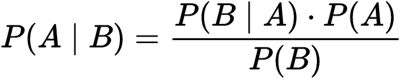


**Question 9: Explain the differences between Gaussian Naïve Bayes, Multinomial Naïve Bayes, and Bernoulli Naïve Bayes**

Answer:
- The key difference between Gaussian Naïve Bayes, Multinomial Naïve Bayes, and Bernoulli Naïve Bayes lies in the type of data they handle: Gaussian Naïve Bayes assumes continuous features follow a normal distribution, Multinomial Naïve Bayes works with discrete counts, and Bernoulli Naïve Bayes deals with binary features. Here's a breakdown:
  - Gaussian Naïve Bayes:
    - Data Type: Assumes continuous features
    - Distribution: Uses a Gaussian (normal) distribution for each feature
    - Use Case: Suitable for numerical data like age or temperature
  - Multinomial Naïve Bayes:
    - Data Type: Assumes features are discrete counts
    - Distribution: Uses a multinomial distribution
    - Use Case: Commonly used in text classification where features represent word counts
  - Bernoulli Naïve Bayes:
    - Data Type: Assumes features are binary (either 0 or 1)
    - Distribution: Uses a Bernoulli distribution
    - Use Case: Often used for tasks like spam detection where features represent the presence or absence of words


In [ ]:
'''Question 10: Breast Cancer Dataset
Write a Python program to train a Gaussian Naïve Bayes classifier on the Breast Cancer
dataset and evaluate accuracy.

Answer:'''
#import the breast cancer dataset
from sklearn.datasets import load_breast_cancer
X, y = load_breast_cancer(return_X_y=True)

#import train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

#import Gaussian and make object
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()

#fit the model using X_train and y_train from train test split
clf.fit(X_train, y_train)


#predict the test data from the trained model above
y_pred = clf.predict(X_test)

#import accuracy score to evaluate the model
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9473684210526315